In [11]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_style("white", rc={
    'axes.grid': False,
    'axes.labelcolor': '0.4',
    'axes.edgecolor': '0.8',
    'axes.facecolor': '0.99',
    'text.color': '0.4',
    'xtick.color': '0.4',
    'ytick.color': '0.4',
    'axes.linewidth': 1,
})
sns.set_palette(sns.color_palette("Set2", 10))
sns.set_context("notebook", font_scale=1.2)

def get_windows(data):
    window_buffer = 10
    window_open = False
    window_start = 0

    last_spike = 0
    duration = data.tail(1).index[0]

    windows = []
    for now, row in data.iterrows():
        if (now - last_spike > window_buffer or now + window_buffer > duration) and window_open:
            window_end = last_spike
            window_size = window_end - window_start
            windows.append({
                "window_size": window_size,
                "window_start": window_start,
                "window_end": window_end,
            })
            window_open = False

        if row["spike"] != 0.:
            last_spike = now
            if not window_open:
                window_open = True
                window_start = now

    states = []
    for now, row in data.iterrows():
        for window in windows:
            if now >= window["window_start"] and now <= window["window_end"]:
                states.append(20.)
                break
        else:
            states.append(0.)
    
    return pd.Series(states, index=data.index)

def plot_neuron(name):
    plt.figure()

    data = pd.read_csv('./tests/results/%s.csv' % name, index_col=0)
    data[["I", "V"]].plot(title=name)
    
    window = get_windows(data)
    window.plot()

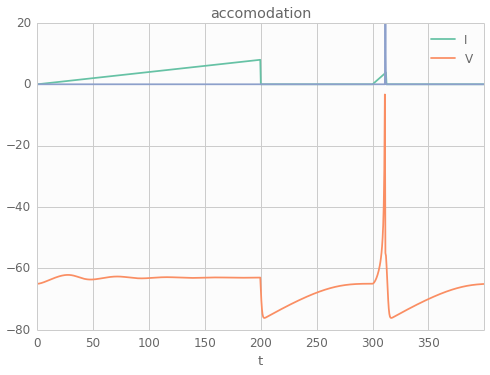

In [12]:
plot_neuron("accomodation")

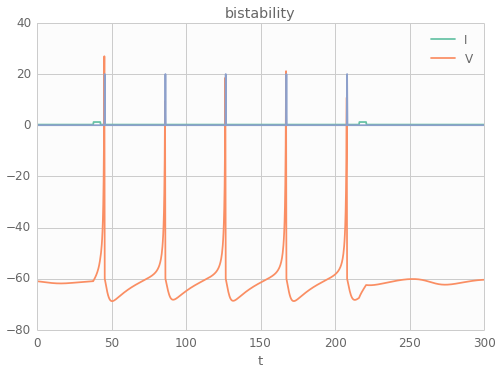

In [13]:
plot_neuron("bistability")

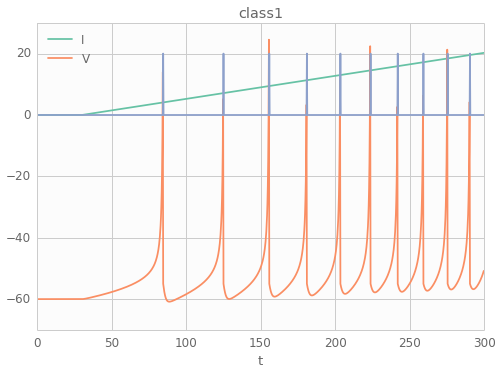

In [14]:
plot_neuron("class1")

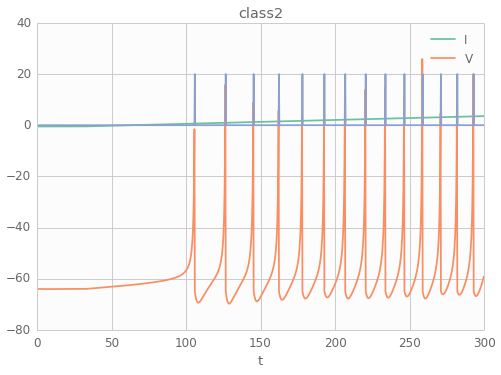

In [15]:
plot_neuron("class2")

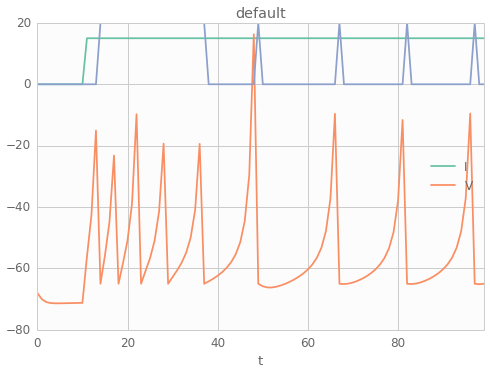

In [16]:
plot_neuron("default")

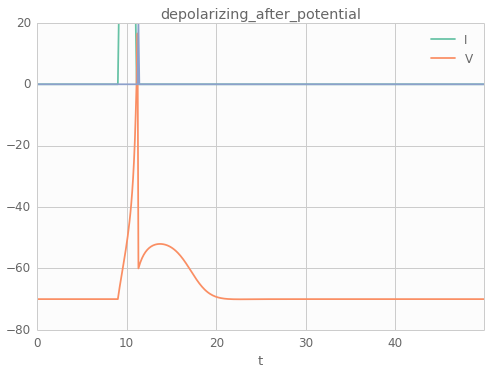

In [17]:
plot_neuron("depolarizing_after_potential")

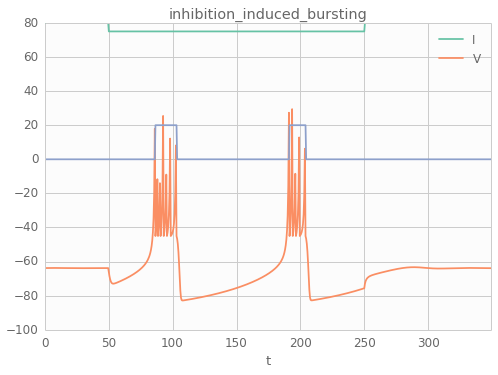

In [18]:
plot_neuron("inhibition_induced_bursting")

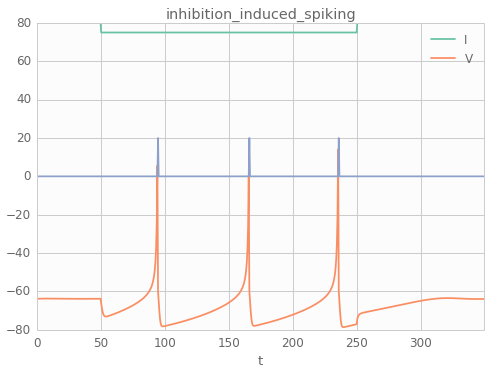

In [19]:
plot_neuron("inhibition_induced_spiking")

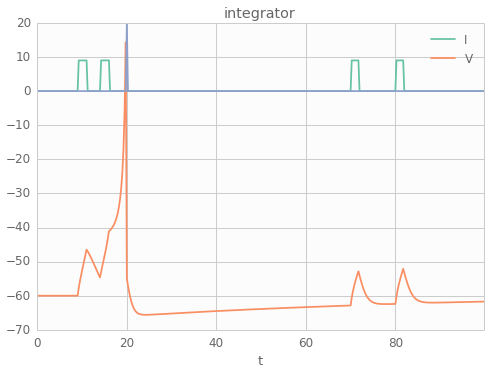

In [20]:
plot_neuron("integrator")

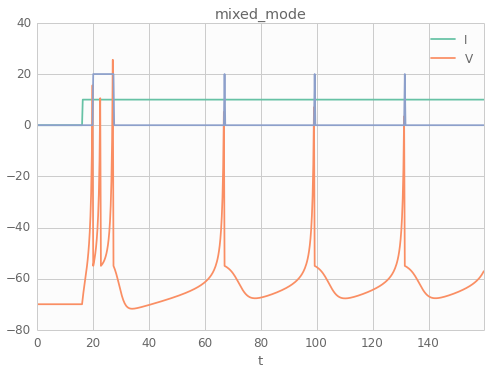

In [21]:
plot_neuron("mixed_mode")

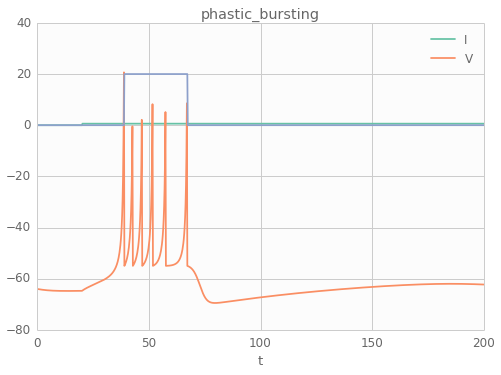

In [22]:
plot_neuron("phastic_bursting")

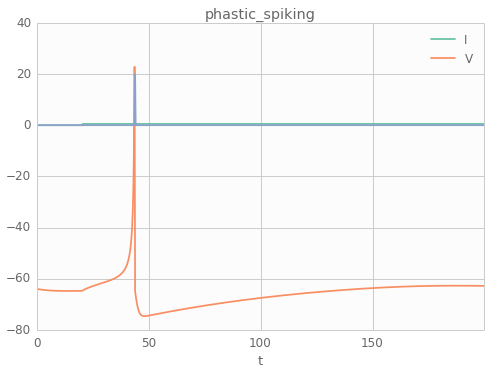

In [23]:
plot_neuron("phastic_spiking")

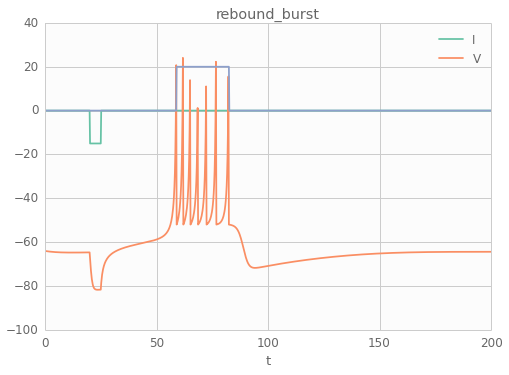

In [24]:
plot_neuron("rebound_burst")

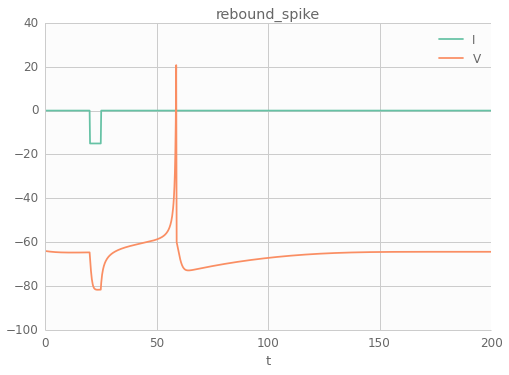

In [118]:
plot_neuron("rebound_spike")

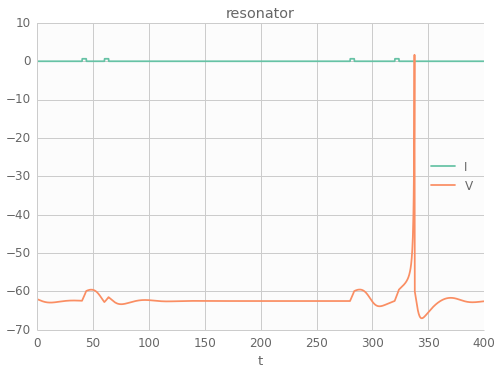

In [119]:
plot_neuron("resonator")

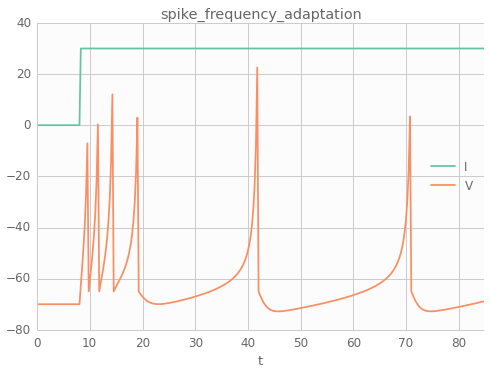

In [120]:
plot_neuron("spike_frequency_adaptation")

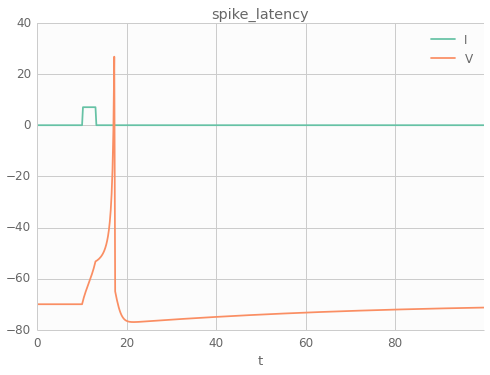

In [121]:
plot_neuron("spike_latency")

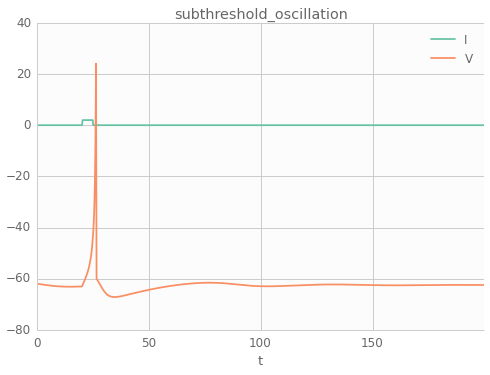

In [122]:
plot_neuron("subthreshold_oscillation")

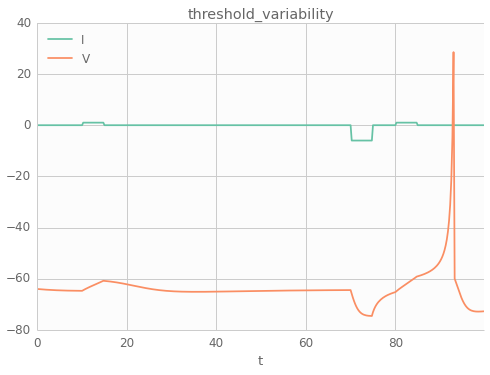

In [123]:
plot_neuron("threshold_variability")

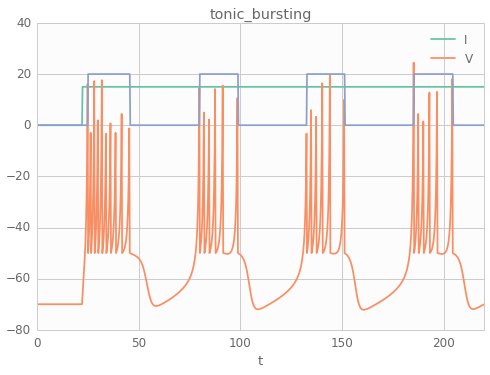

In [63]:
plot_neuron("tonic_bursting")

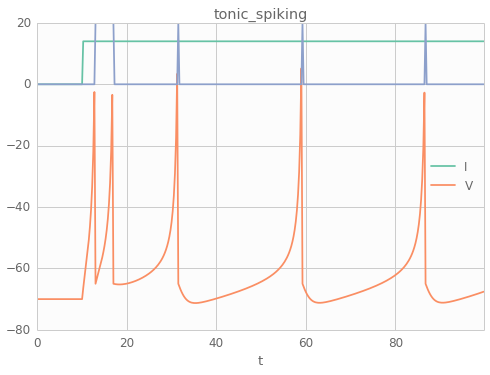

In [62]:
plot_neuron("tonic_spiking")

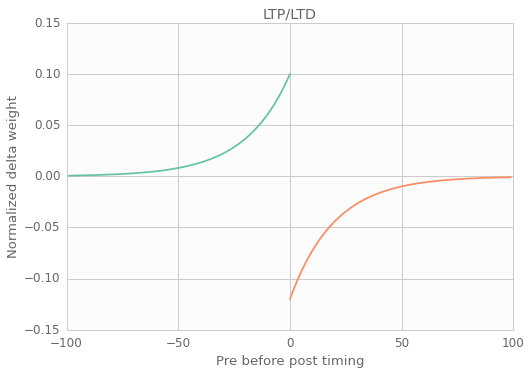

In [65]:
ltp = pd.read_csv('./tests/results/stdp_ltp.csv')
ltd = pd.read_csv('./tests/results/stdp_ltd.csv')

plt.plot(ltp["t"], ltp["d"])
plt.plot(ltd["t"], ltd["d"])

plt.grid()
plt.xlabel("Pre before post timing")
plt.ylabel("Normalized delta weight")
plt.title("LTP/LTD")